#### Updating data

In [4]:
from Reuters import *
from utilities import *

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)

This code is meant to update the database, and won't build one from scratch

In [5]:
if os.path.exists(PARENT_DIR + "/data/Reuters.csv"):
    old_data = pd.read_csv(PARENT_DIR + "/data/Reuters.csv")
else:
    os.makedirs(PARENT_DIR + "/data", exist_ok=True)
    old_data = pd.DataFrame({"URL": [], "Date": [], "Title": [], "Text": []})

pages = latestPage(old_data).fetch()
urls = URLFetcher(pages).fetch()
new_data = articleFetcher(urls).fetch()
data = concatData(old_data, new_data)

data.to_csv(PARENT_DIR + "/data/Reuters.csv", index=True)

-> Last page scraped: 2
-> Scraper |████████████████████████████████████████| 2/2 [100%] in 0.8s (2.62/s)                                       
-> 31 URLs fetched successfully!
-> Scraper |██████████████████████████████████████▊⚠︎| (!) 30/31 [97%] in 17.9s (1.67/s)                                 
-> New data fetched successfully!


In [4]:
data.head(1)

,URL,Title,Text
Date,,,
2022-07-13,https://www.reuters.com/article/ukraine-crisis...,Ukraine says ships pass through Danube rivermo...,Ukraine sparked hopes Tuesday for an increase...


In [ ]:
source = "Reuters"
reuters_data = pd.read_csv(PARENT_DIR + "/data/Reuters.csv")
reuters_data.head(1)

#### LDA topic identification

In [ ]:
doc_topic, topic_word, vocabulary = learn_topics(reuters_data, topicnum=30, vocabsize=10000, num_iter=2000) 

In [12]:
topics = []
for i in range(len(reuters_data)):
    topics.append(doc_topic[i].argmax())

In [ ]:
for i in range(10):
    print(f"{reuters_data.iloc[i][2]} TOPIC: {doc_topic[i].argmax()}")

In [ ]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabulary)[np.argsort(topic_dist)][:-8:-1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))


In [ ]:
save_topicmodel(doc_topic, topic_word, vocabulary, source)

In [ ]:
period = 7
novelties, transiences, resonances = novelty_transience_resonance(doc_topic, period)

for index in range(0,period):
    transiences.insert(0, 0)
    transiences.append(0)
    novelties.insert(0, 0)
    novelties.append(0)
    resonances.insert(0, 0)
    resonances.append(0)

save_novel_trans_reson(novelties, transiences, resonances)

In [ ]:
ntr_reuters_data = reuters_data
ntr_reuters_data['Novelty'] = novelties
ntr_reuters_data['Transience'] = novelties
ntr_reuters_data['Resonance'] = resonances
ntr_reuters_data['Topic'] = topics

ntr_reuters_data.to_csv(PARENT_DIR + "/data/"+source+"_ntr.csv", index=False)
ntr_reuters_data.head(5)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
ntr_reuters_data = pd.read_csv(PARENT_DIR + "/data/"+source+"_ntr.csv", parse_dates=['Date'], index_col= ['Date'])

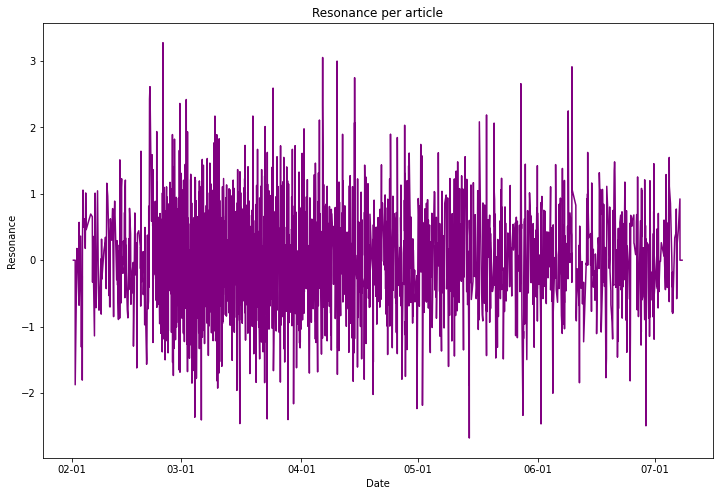

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(ntr_reuters_data.index.values,
       ntr_reuters_data['Resonance'],
       color='purple')

ax.set(xlabel="Date",
       ylabel="Resonance",
       title="Resonance per article")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)